In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from bq.queries import run_query

In [3]:
# Load the data
events = pd.DataFrame(
	run_query(
		"""
		SELECT SQLDATE
		FROM `gdelt-bq.gdeltv2.events`
		WHERE SQLDATE IS NOT NULL
		ORDER BY rand()
		LIMIT 100000
		""",
		debug=True
	)
)

events.sample(n=10)

Running query: SELECT SQLDATE FROM `gdelt-bq.gdeltv2.events` WHERE SQLDATE IS NOT NULL ORDER BY rand() LIMIT 100000
Query complete, fetching data.
Downloading: 100%|██████████|
Fetched 100000 rows.


,SQLDATE
49772,20220819
92490,20181106
42027,20220505
74180,20180118
36505,20150321
2695,20160818
86887,20190508
20366,20170302
15891,20150512
20387,20160729


In [4]:
# Convert SQLDATE to datetime
events['Date'] = pd.to_datetime(events['SQLDATE'], format='%Y%m%d')

# Extract the year
events['Year'] = events['Date'].dt.year

# Count the number of events per year
events_per_year = events['Year'].value_counts().sort_index().reset_index()
events_per_year.columns = ['Year', 'EventCount']

events_per_year

,Year,EventCount
0,1920,98
1,2006,1
2,2007,3
3,2008,3
4,2009,4
5,2010,2
6,2012,4
7,2013,4
8,2014,109
9,2015,11328


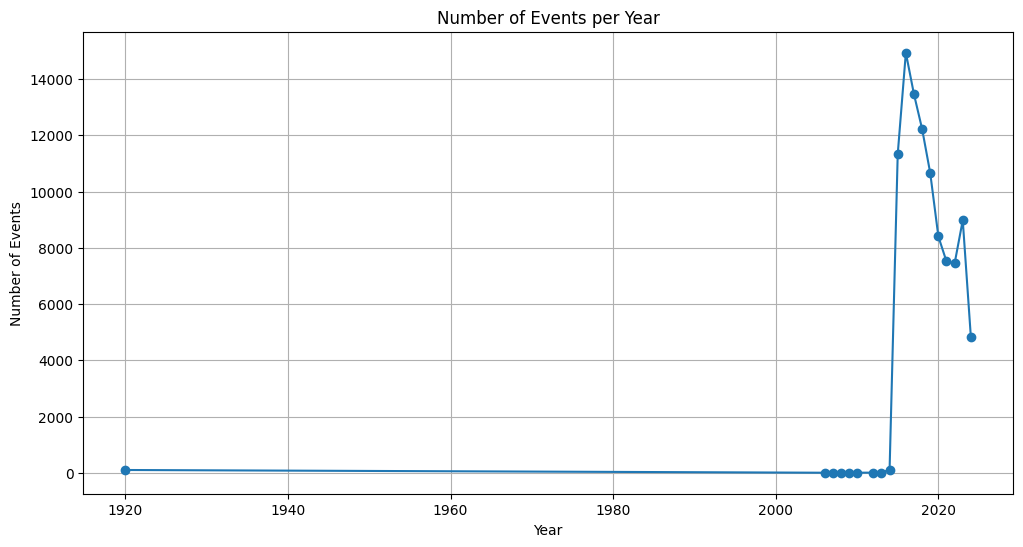

In [5]:
# Plot the events per year
plt.figure(figsize=(12, 6))
plt.plot(events_per_year['Year'], events_per_year['EventCount'], marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.title('Number of Events per Year')
plt.grid(True)
plt.show()

In [6]:
# Prepare the data for linear regression
X = events_per_year[['Year']]
y = events_per_year['EventCount']

# Create and train the model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [36]:
# Predict the number of events for the next year
next_year = pd.DataFrame([events_per_year['Year'].max() + 1], columns=['Year'])
predicted_event_count = model.predict(next_year)

# Print the predicted event count
print(f'Predicted number of events for {next_year.iloc[0, 0]}: {predicted_event_count[0]:.0f}')

Predicted number of events for 2025: 6630, [6629.99735782]


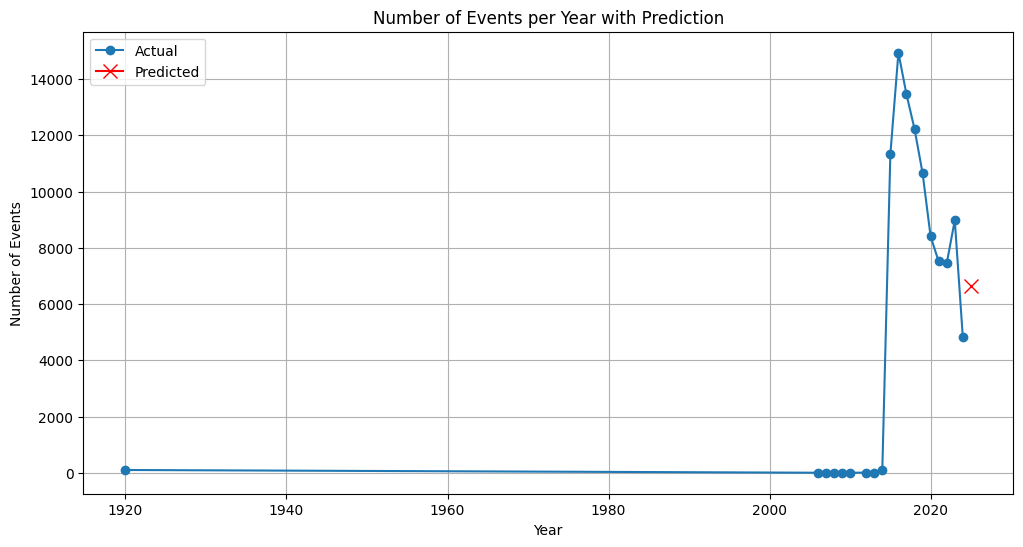

In [9]:
# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(events_per_year['Year'], events_per_year['EventCount'], marker='o', label='Actual')
plt.plot(next_year, predicted_event_count, marker='x', markersize=10, color='red', label='Predicted')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.title('Number of Events per Year with Prediction')
plt.legend()
plt.grid(True)
plt.show()